In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF

In [2]:
df = pd.read_csv(r"C:\Users\Mohammad El Hakawati\Downloads\Telecom Network Quality Metrics Dataset.csv")

# PCA with different clustering techniques

## PCA

In [4]:
X = df.drop("ServiceQuality",axis=1)
y = df["ServiceQuality"]

In [5]:
standardized = (X - np.mean(X, axis=0)) / np.std(X, ddof=1, axis=0)

In [6]:
covMatrix = np.cov(standardized.T, bias = True)

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)

In [8]:
pairs = []
for i in range(len(eigenvalues)):
  pairs.append((np.abs(eigenvalues[i]), eigenvectors[:, i]))

In [9]:
totalVar = np.sum(np.abs(eigenvalues))
varRatio = np.abs(eigenvalues) / totalVar
cumVar = np.cumsum(varRatio)
noComp = np.argmax(cumVar >=  0.6) + 1
eigenVec = np.array([eigen[1] for eigen in pairs[:noComp]])

In [10]:
pca = standardized.dot(eigenVec.T)

In [11]:
print("Original Data Shape:", df.shape)
print("PCA Transformed Data Shape:", pca.shape)

Original Data Shape: (558, 29)
PCA Transformed Data Shape: (558, 2)


In [12]:
pca

,0,1
0,1.531325,-0.914215
1,-3.909235,-1.820507
2,-0.365129,-0.812389
3,-2.499085,-0.569095
4,1.357250,2.206641
...,...,...
553,5.107160,-3.498325
554,3.855128,-1.713948
555,17.132104,-7.209356
556,-2.693826,-0.414197


## Clustering

### Hierarchical Clustering

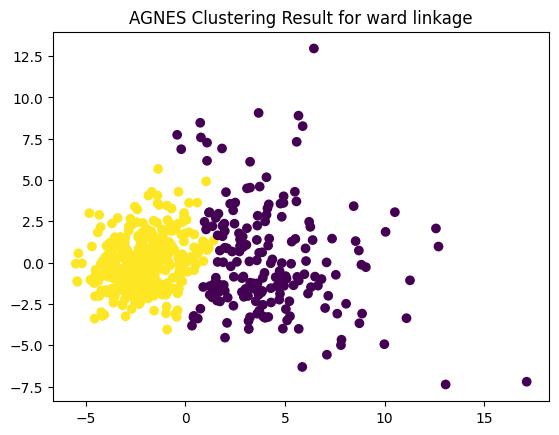

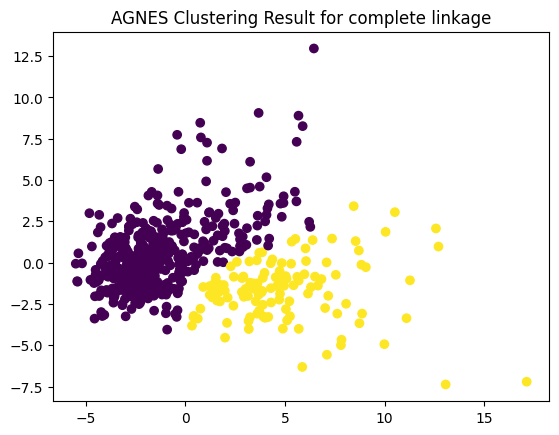

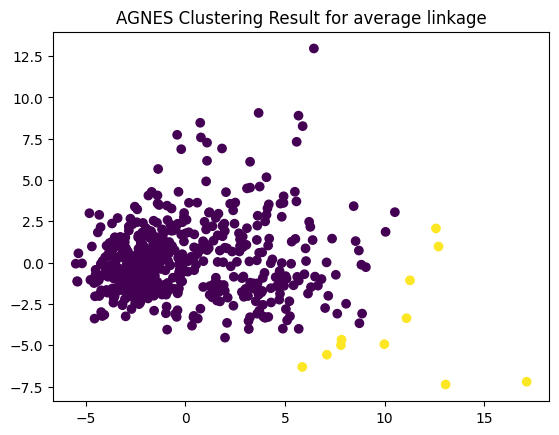

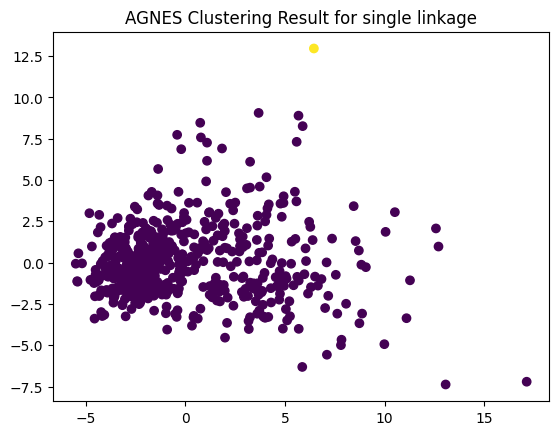

                         ward    complete    average     single
AMI                  0.576996    0.485033   0.052174  -0.001119
Silhouette           0.509323    0.473333   0.569234   0.643971
Calinski_Harabasz  559.758053  398.911917  91.123111  11.781178
Davies_Bouldin       0.852331    0.820059   0.638613   0.248902
Adjusted_Rand        0.700501    0.506397   0.031811  -0.001565


In [13]:
linkage=["ward", "complete", "average", "single"]
agg_pca = pd.DataFrame(columns=linkage,index=['AMI', 'Silhouette', 'Calinski_Harabasz', 'Davies_Bouldin', 'Adjusted_Rand'])
for i in linkage:

    model = AgglomerativeClustering(n_clusters=2,linkage=i)
    clusters = model.fit_predict(pca)

    ami_score = adjusted_mutual_info_score(y, clusters)
    silhouette_avg = silhouette_score(pca, clusters)
    calinski_harabasz = calinski_harabasz_score(pca, clusters)
    davies_bouldin = davies_bouldin_score(pca, clusters)
    adjusted_rand = adjusted_rand_score(y, clusters)

    agg_pca[i]['AMI'] = ami_score
    agg_pca[i]['Silhouette'] = silhouette_avg
    agg_pca[i]['Calinski_Harabasz'] = calinski_harabasz
    agg_pca[i]['Davies_Bouldin'] = davies_bouldin
    agg_pca[i]['Adjusted_Rand'] = adjusted_rand

    plt.scatter(pca[0],pca[1], c=clusters)
    plt.title(f'AGNES Clustering Result for {i} linkage')
    plt.show()
    
print(agg_pca)

### Density-Based Clustering

AMI_score = 0.3481195756896627
silhouette score = 0.10782972779990253
calinski harabasz score = 51.817120328678186
davies bouldin score = 4.553080905825901
adjusted rand score = 0.4634192536273039


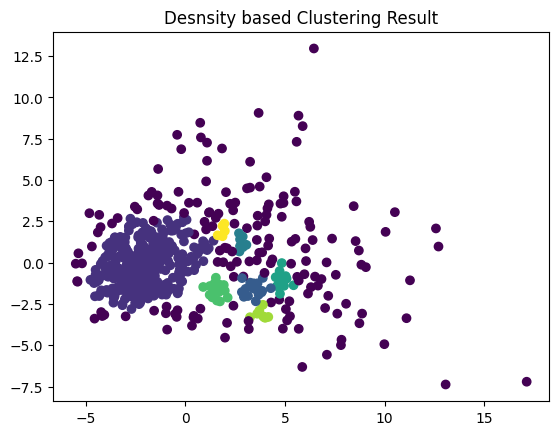

In [14]:
model = DBSCAN()
clusters = model.fit_predict(pca)

ami_score_PCA_DBSCAN = adjusted_mutual_info_score(y, clusters)
silhouette_avg_PCA_DBSCAN = silhouette_score(pca, clusters)
calinski_harabasz_PCA_DBSCAN = calinski_harabasz_score(pca, clusters)
davies_bouldin_PCA_DBSCAN = davies_bouldin_score(pca, clusters)
adjusted_rand_PCA_DBSCAN = adjusted_rand_score(y, clusters)

print(f"AMI_score = {ami_score_PCA_DBSCAN}\nsilhouette score = {silhouette_avg_PCA_DBSCAN}\ncalinski harabasz score = {calinski_harabasz_PCA_DBSCAN}\ndavies bouldin score = {davies_bouldin_PCA_DBSCAN}\nadjusted rand score = {adjusted_rand_PCA_DBSCAN}")
plt.scatter(pca[0],pca[1], c=clusters)
plt.title('Desnsity based Clustering Result')
plt.show()

### Partitioning clustering

c:\Users\Mohammad El Hakawati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


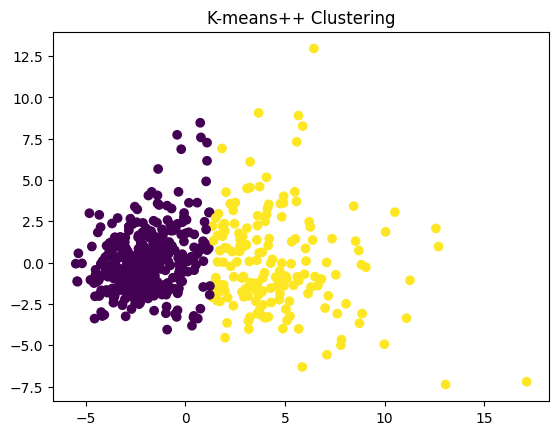

Adjusted Mutual Information Score: 0.5722743143235735
Silhouette Score: 0.5182080649982302
Calinski-Harabasz Index: 581.4997201786456
Davies-Bouldin Index: 0.8168339048743583
Adjusted Rand Index: 0.6813322645179193


In [15]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(pca)

plt.scatter(pca[0], pca[1], c=clusters)
plt.title('K-means++ Clustering')
plt.show()
ami_score_PCA_KMEANS = adjusted_mutual_info_score(y, clusters)
silhouette_avg_PCA_KMEANS = silhouette_score(pca, clusters)
calinski_harabasz_PCA_KMEANS = calinski_harabasz_score(pca, clusters)
davies_bouldin_PCA_KMEANS = davies_bouldin_score(pca, clusters)
adjusted_rand_PCA_KMEANS = adjusted_rand_score(y, clusters)

print(f"Adjusted Mutual Information Score: {ami_score_PCA_KMEANS}")
print(f"Silhouette Score: {silhouette_avg_PCA_KMEANS}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_PCA_KMEANS}")
print(f"Davies-Bouldin Index: {davies_bouldin_PCA_KMEANS}")
print(f"Adjusted Rand Index: {adjusted_rand_PCA_KMEANS}")

# TSVD with different clustering techniques

In [16]:
X = df.drop("ServiceQuality",axis=1)
y = df["ServiceQuality"]

In [17]:
X.shape

(558, 28)

In [18]:
model = FastICA(n_components=5)
X_ICA = model.fit_transform(X)
X_ICA.shape

(558, 5)

### Hierarchical Clustering


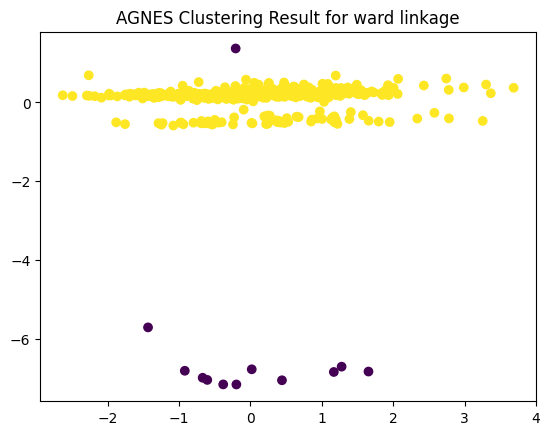

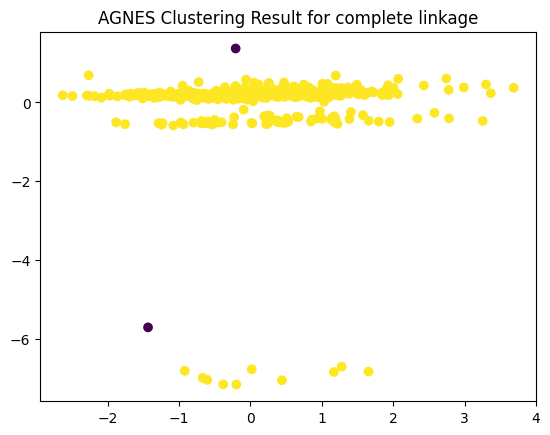

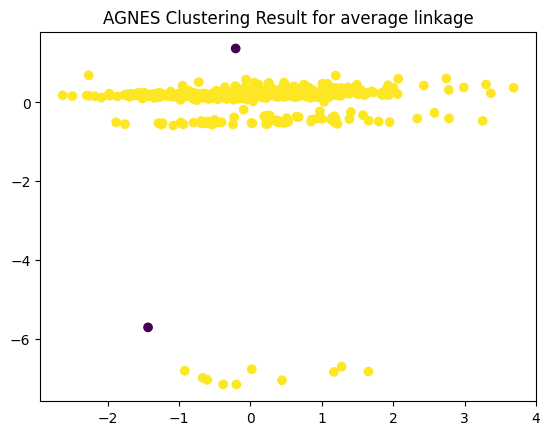

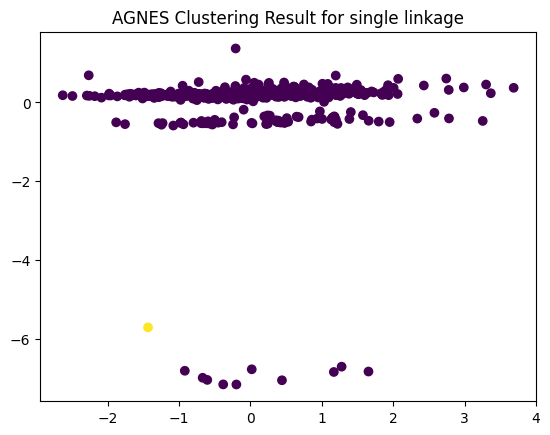

                         ward   complete    average     single
AMI                  -0.00014   0.007327   0.007327   0.001987
Silhouette           0.742758   0.840549   0.840549   0.820428
Calinski_Harabasz  124.548979  84.067362  84.067362  39.662767
Davies_Bouldin       0.953087   0.623713   0.623713   0.121632
Adjusted_Rand        0.006937   0.005583   0.005583    0.00278


In [19]:
linkage=["ward", "complete", "average", "single"]
agg_TSVD = pd.DataFrame(columns=linkage,index=['AMI', 'Silhouette', 'Calinski_Harabasz', 'Davies_Bouldin', 'Adjusted_Rand'])
for i in linkage:

    model = AgglomerativeClustering(n_clusters=2,linkage=i)
    clusters = model.fit_predict(X_ICA)

    ami_score = adjusted_mutual_info_score(y, clusters)
    silhouette_avg = silhouette_score(X_ICA, clusters)
    calinski_harabasz = calinski_harabasz_score(X_ICA, clusters)
    davies_bouldin = davies_bouldin_score(X_ICA, clusters)
    adjusted_rand = adjusted_rand_score(y, clusters)

    agg_TSVD[i]['AMI'] = ami_score
    agg_TSVD[i]['Silhouette'] = silhouette_avg
    agg_TSVD[i]['Calinski_Harabasz'] = calinski_harabasz
    agg_TSVD[i]['Davies_Bouldin'] = davies_bouldin
    agg_TSVD[i]['Adjusted_Rand'] = adjusted_rand

    plt.scatter(X_ICA[:,0],X_ICA[:,1], c=clusters)
    plt.title(f'AGNES Clustering Result for {i} linkage')
    plt.show()
    
print(agg_TSVD)

### Density-Based Clustering

AMI_score = 0.41909366226646305
silhouette score = -0.1975385596939081
calinski harabasz score = 15.539917298737402
davies bouldin score = 2.332998203205704
adjusted rand score = 0.5193239846127924


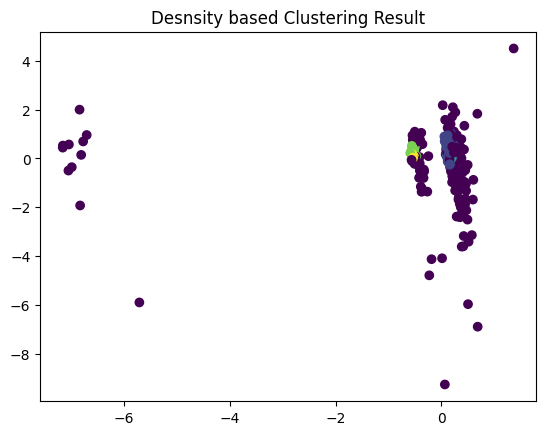

In [20]:
model = DBSCAN()
clusters = model.fit_predict(X_ICA)

ami_score_TSVD_DBSCAN = adjusted_mutual_info_score(y, clusters)
silhouette_avg_TSVD_DBSCAN = silhouette_score(X_ICA, clusters)
calinski_harabasz_TSVD_DBSCAN = calinski_harabasz_score(X_ICA, clusters)
davies_bouldin_TSVD_DBSCAN = davies_bouldin_score(X_ICA, clusters)
adjusted_rand_TSVD_DBSCAN = adjusted_rand_score(y, clusters)

print(f"AMI_score = {ami_score_TSVD_DBSCAN}\nsilhouette score = {silhouette_avg_TSVD_DBSCAN}\ncalinski harabasz score = {calinski_harabasz_TSVD_DBSCAN}\ndavies bouldin score = {davies_bouldin_TSVD_DBSCAN}\nadjusted rand score = {adjusted_rand_TSVD_DBSCAN}")
plt.scatter(X_ICA[:,1],X_ICA[:,3], c=clusters)
plt.title('Desnsity based Clustering Result')
plt.show()

### Partitioning clustering

c:\Users\Mohammad El Hakawati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


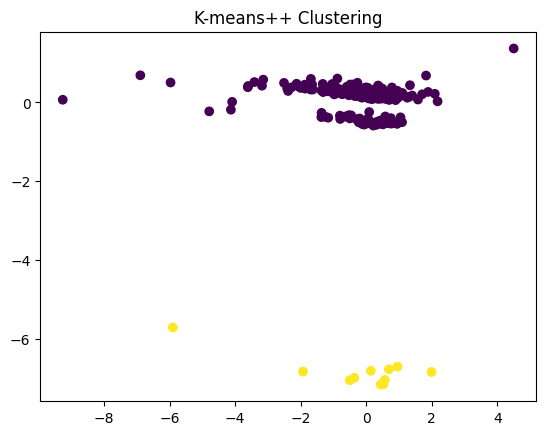

Adjusted Mutual Information Score: -0.001544338631396381
Silhouette Score: 0.7221918322937759
Calinski-Harabasz Index: 130.30850742844325
Davies-Bouldin Index: 0.6484991594455769
Adjusted Rand Index: 0.004227883748154705


In [21]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_ICA)

plt.scatter(X_ICA[:,3], X_ICA[:,1], c=clusters)
plt.title('K-means++ Clustering')
plt.show()
ami_score_TSVD_KMEANS = adjusted_mutual_info_score(y, clusters)
silhouette_avg_TSVD_KMEANS = silhouette_score(X_ICA, clusters)
calinski_harabasz_TSVD_KMEANS = calinski_harabasz_score(X_ICA, clusters)
davies_bouldin_TSVD_KMEANS = davies_bouldin_score(X_ICA, clusters)
adjusted_rand_TSVD_KMEANS = adjusted_rand_score(y, clusters)

print(f"Adjusted Mutual Information Score: {ami_score_TSVD_KMEANS}")
print(f"Silhouette Score: {silhouette_avg_TSVD_KMEANS}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_TSVD_KMEANS}")
print(f"Davies-Bouldin Index: {davies_bouldin_TSVD_KMEANS}")
print(f"Adjusted Rand Index: {adjusted_rand_TSVD_KMEANS}")

# NMF with different clustering techniques

In [22]:
X = df.drop("ServiceQuality",axis=1)
y = df["ServiceQuality"]

In [23]:
model = NMF(n_components=8,random_state=42)
X_NMF = model.fit_transform(X)
X_NMF.shape

(558, 8)

### Hierarchical Clustering


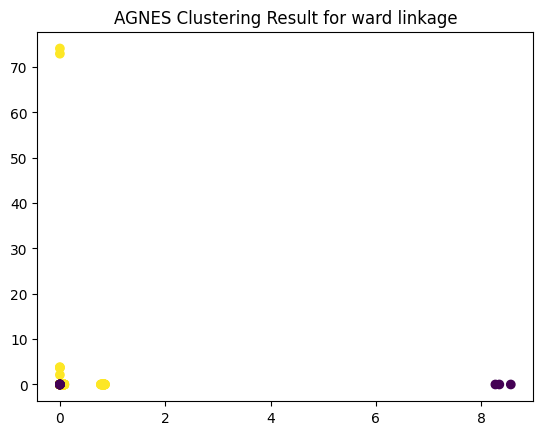

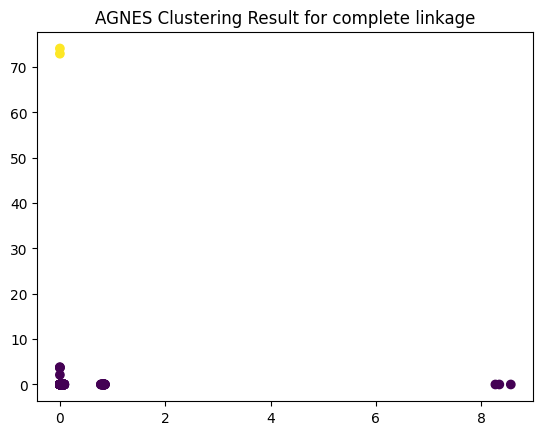

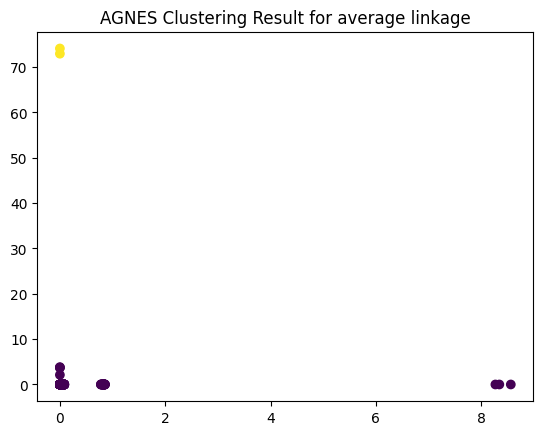

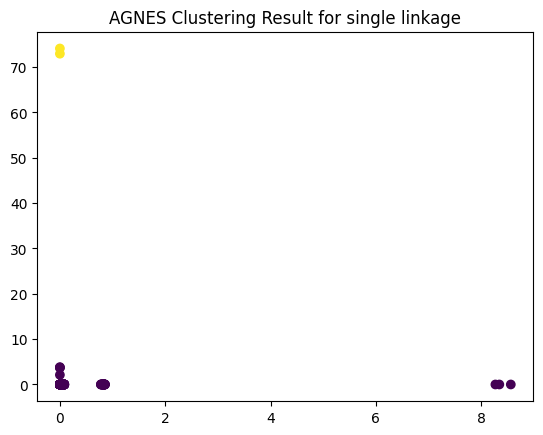

                         ward    complete     average      single
AMI                 -0.001544   -0.003118   -0.003118   -0.003118
Silhouette           0.944605    0.951531    0.951531    0.951531
Calinski_Harabasz  306.927918  165.314186  165.314186  165.314186
Davies_Bouldin       1.002097     0.04814     0.04814     0.04814
Adjusted_Rand        0.004228    0.001184    0.001184    0.001184


In [24]:
linkage=["ward", "complete", "average", "single"]
agg_NMF = pd.DataFrame(columns=linkage,index=['AMI', 'Silhouette', 'Calinski_Harabasz', 'Davies_Bouldin', 'Adjusted_Rand'])
for i in linkage:

    model = AgglomerativeClustering(n_clusters=2,linkage=i)
    clusters = model.fit_predict(X_NMF)

    ami_score = adjusted_mutual_info_score(y, clusters)
    silhouette_avg = silhouette_score(X_NMF, clusters)
    calinski_harabasz = calinski_harabasz_score(X_NMF, clusters)
    davies_bouldin = davies_bouldin_score(X_NMF, clusters)
    adjusted_rand = adjusted_rand_score(y, clusters)

    agg_NMF[i]['AMI'] = ami_score
    agg_NMF[i]['Silhouette'] = silhouette_avg
    agg_NMF[i]['Calinski_Harabasz'] = calinski_harabasz
    agg_NMF[i]['Davies_Bouldin'] = davies_bouldin
    agg_NMF[i]['Adjusted_Rand'] = adjusted_rand

    plt.scatter(X_NMF[:,0],X_NMF[:,1], c=clusters)
    plt.title(f'AGNES Clustering Result for {i} linkage')
    plt.show()
    
print(agg_NMF)

### Density-Based Clustering

AMI_score = 0.018169298779131902
silhouette score = 0.8197285570407736
calinski harabasz score = 29.258927724907533
davies bouldin score = 2.1093330477637844
adjusted rand score = 0.042496793798358815


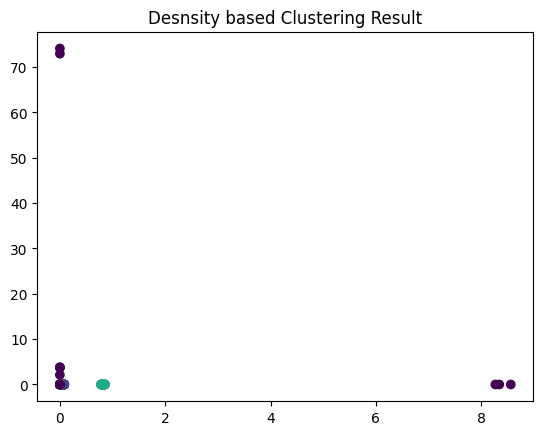

In [25]:
model = DBSCAN()
clusters = model.fit_predict(X_NMF)

ami_score_NMF_DBSCAN = adjusted_mutual_info_score(y, clusters)
silhouette_avg_NMF_DBSCAN = silhouette_score(X_NMF, clusters)
calinski_harabasz_NMF_DBSCAN = calinski_harabasz_score(X_NMF, clusters)
davies_bouldin_NMF_DBSCAN = davies_bouldin_score(X_NMF, clusters)
adjusted_rand_NMF_DBSCAN = adjusted_rand_score(y, clusters)

print(f"AMI_score = {ami_score_NMF_DBSCAN}\nsilhouette score = {silhouette_avg_NMF_DBSCAN}\ncalinski harabasz score = {calinski_harabasz_NMF_DBSCAN}\ndavies bouldin score = {davies_bouldin_NMF_DBSCAN}\nadjusted rand score = {adjusted_rand_NMF_DBSCAN}")
plt.scatter(X_NMF[:,0],X_NMF[:,1], c=clusters)
plt.title('Desnsity based Clustering Result')
plt.show()

### Partitioning clustering

c:\Users\Mohammad El Hakawati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


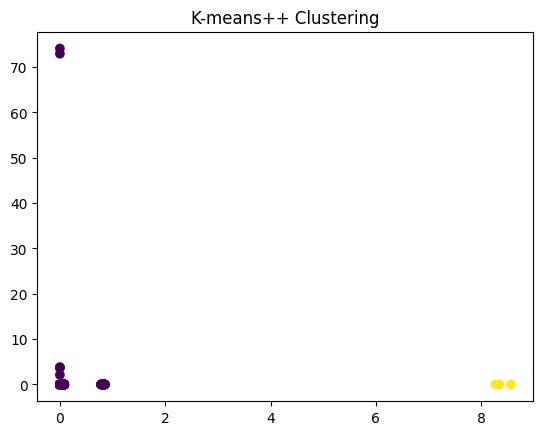

Adjusted Mutual Information Score: -0.001544338631396381
Silhouette Score: 0.9444632047510354
Calinski-Harabasz Index: 297.59309555963176
Davies-Bouldin Index: 0.31288859240053013
Adjusted Rand Index: 0.005120771636617795


In [26]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_NMF)

plt.scatter(X_NMF[:,0], X_NMF[:,1], c=clusters)
plt.title('K-means++ Clustering')
plt.show()
ami_score_NMF_KMEANS = adjusted_mutual_info_score(y, clusters)
silhouette_avg_NMF_KMEANS = silhouette_score(X_NMF, clusters)
calinski_harabasz_NMF_KMEANS = calinski_harabasz_score(X_NMF, clusters)
davies_bouldin_NMF_KMEANS = davies_bouldin_score(X_NMF, clusters)
adjusted_rand_NMF_KMEANS = adjusted_rand_score(y, clusters)

print(f"Adjusted Mutual Information Score: {ami_score_TSVD_KMEANS}")
print(f"Silhouette Score: {silhouette_avg_NMF_KMEANS}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_NMF_KMEANS}")
print(f"Davies-Bouldin Index: {davies_bouldin_NMF_KMEANS}")
print(f"Adjusted Rand Index: {adjusted_rand_NMF_KMEANS}")

# LDA with different clustering techniques

In [27]:
X = df.drop("ServiceQuality",axis=1)
y = df["ServiceQuality"]

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
lda = LinearDiscriminantAnalysis(n_components=1) 
X_LDA = lda.fit_transform(X, y)

### Hierarchical Clustering


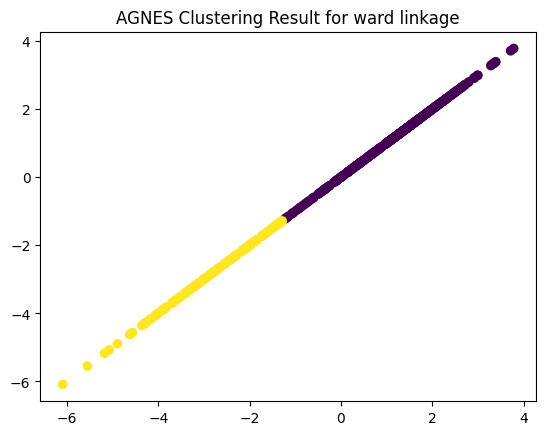

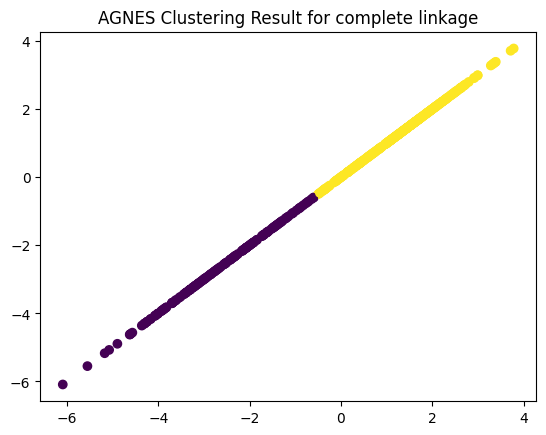

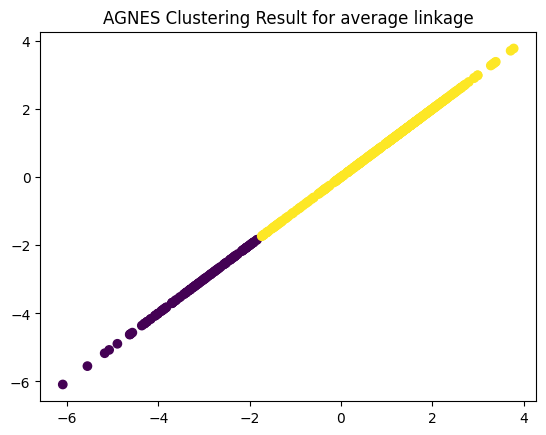

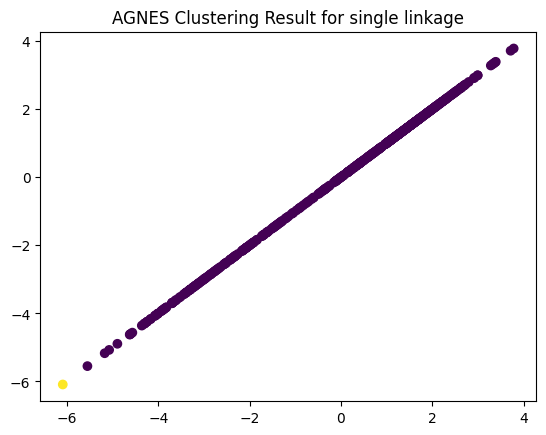

                          ward     complete      average    single
AMI                   0.676238     0.796696     0.552345  0.001987
Silhouette            0.702219      0.70837     0.662198   0.52038
Calinski_Harabasz  2039.902566  2169.418339  1518.228036  8.661044
Davies_Bouldin        0.389125     0.403962      0.38578  0.288631
Adjusted_Rand         0.748786     0.867038     0.590701   0.00278


In [30]:
linkage=["ward", "complete", "average", "single"]
agg_LDA = pd.DataFrame(columns=linkage,index=['AMI', 'Silhouette', 'Calinski_Harabasz', 'Davies_Bouldin', 'Adjusted_Rand'])
for i in linkage:

    model = AgglomerativeClustering(n_clusters=2,linkage=i)
    clusters = model.fit_predict(X_LDA)

    ami_score = adjusted_mutual_info_score(y, clusters)
    silhouette_avg = silhouette_score(X_LDA, clusters)
    calinski_harabasz = calinski_harabasz_score(X_LDA, clusters)
    davies_bouldin = davies_bouldin_score(X_LDA, clusters)
    adjusted_rand = adjusted_rand_score(y, clusters)

    agg_LDA[i]['AMI'] = ami_score
    agg_LDA[i]['Silhouette'] = silhouette_avg
    agg_LDA[i]['Calinski_Harabasz'] = calinski_harabasz
    agg_LDA[i]['Davies_Bouldin'] = davies_bouldin
    agg_LDA[i]['Adjusted_Rand'] = adjusted_rand

    plt.scatter(X_LDA[:,0],X_LDA[:,0], c=clusters)
    plt.title(f'AGNES Clustering Result for {i} linkage')
    plt.show()
    
print(agg_LDA)

### Density-Based Clustering

AMI_score = 0.0019866117995911642
silhouette score = 0.5203797523303708
calinski harabasz score = 8.66104356718288
davies bouldin score = 0.28863073578559906
adjusted rand score = 0.0027801389889782853


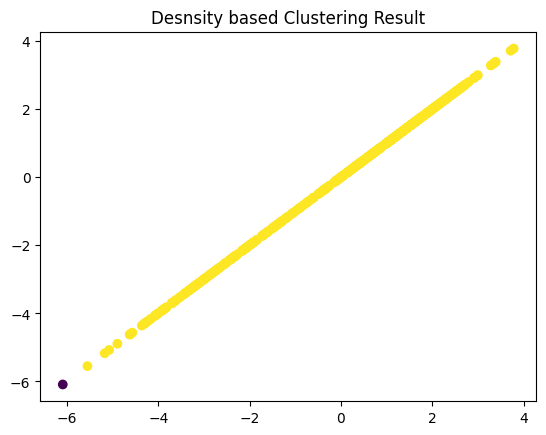

In [31]:
model = DBSCAN()
clusters = model.fit_predict(X_LDA)

ami_score_LDA_DBSCAN = adjusted_mutual_info_score(y, clusters)
silhouette_avg_LDA_DBSCAN = silhouette_score(X_LDA, clusters)
calinski_harabasz_LDA_DBSCAN = calinski_harabasz_score(X_LDA, clusters)
davies_bouldin_LDA_DBSCAN = davies_bouldin_score(X_LDA, clusters)
adjusted_rand_LDA_DBSCAN = adjusted_rand_score(y, clusters)

print(f"AMI_score = {ami_score_LDA_DBSCAN}\nsilhouette score = {silhouette_avg_LDA_DBSCAN}\ncalinski harabasz score = {calinski_harabasz_LDA_DBSCAN}\ndavies bouldin score = {davies_bouldin_LDA_DBSCAN}\nadjusted rand score = {adjusted_rand_LDA_DBSCAN}")
plt.scatter(X_LDA[:,0],X_LDA[:,0], c=clusters)
plt.title('Desnsity based Clustering Result')
plt.show()

### Partitioning clustering

c:\Users\Mohammad El Hakawati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


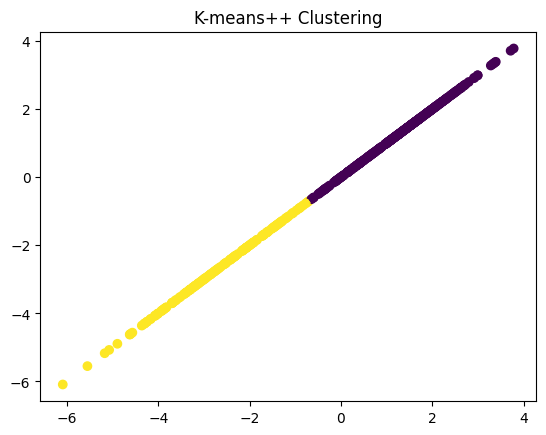

Adjusted Mutual Information Score: 0.0019866117995911642
Silhouette Score: 0.7100729576302199
Calinski-Harabasz Index: 2178.712052759605
Davies-Bouldin Index: 0.399861262441315
Adjusted Rand Index: 0.846812230818506


In [32]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_LDA)

plt.scatter(X_LDA[:,0], X_LDA[:,0], c=clusters)
plt.title('K-means++ Clustering')
plt.show()
ami_score_LDA_KMEANS = adjusted_mutual_info_score(y, clusters)
silhouette_avg_LDA_KMEANS = silhouette_score(X_LDA, clusters)
calinski_harabasz_LDA_KMEANS = calinski_harabasz_score(X_LDA, clusters)
davies_bouldin_LDA_KMEANS = davies_bouldin_score(X_LDA, clusters)
adjusted_rand_LDA_KMEANS = adjusted_rand_score(y, clusters)

print(f"Adjusted Mutual Information Score: {ami_score_LDA_DBSCAN}")
print(f"Silhouette Score: {silhouette_avg_LDA_KMEANS}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_LDA_KMEANS}")
print(f"Davies-Bouldin Index: {davies_bouldin_LDA_KMEANS}")
print(f"Adjusted Rand Index: {adjusted_rand_LDA_KMEANS}")

# Visualization

In [51]:
linkage_methods = ['ward', 'complete', 'average', 'single']
PCA_metrics = ['AMI', 'Silhouette', 'Calinski_Harabasz', 'Davies_Bouldin', 'Adjusted_Rand']
metrics = ['AMI', 'Silhouette','Davies_Bouldin', 'Adjusted_Rand']

## PCA

### AGNES

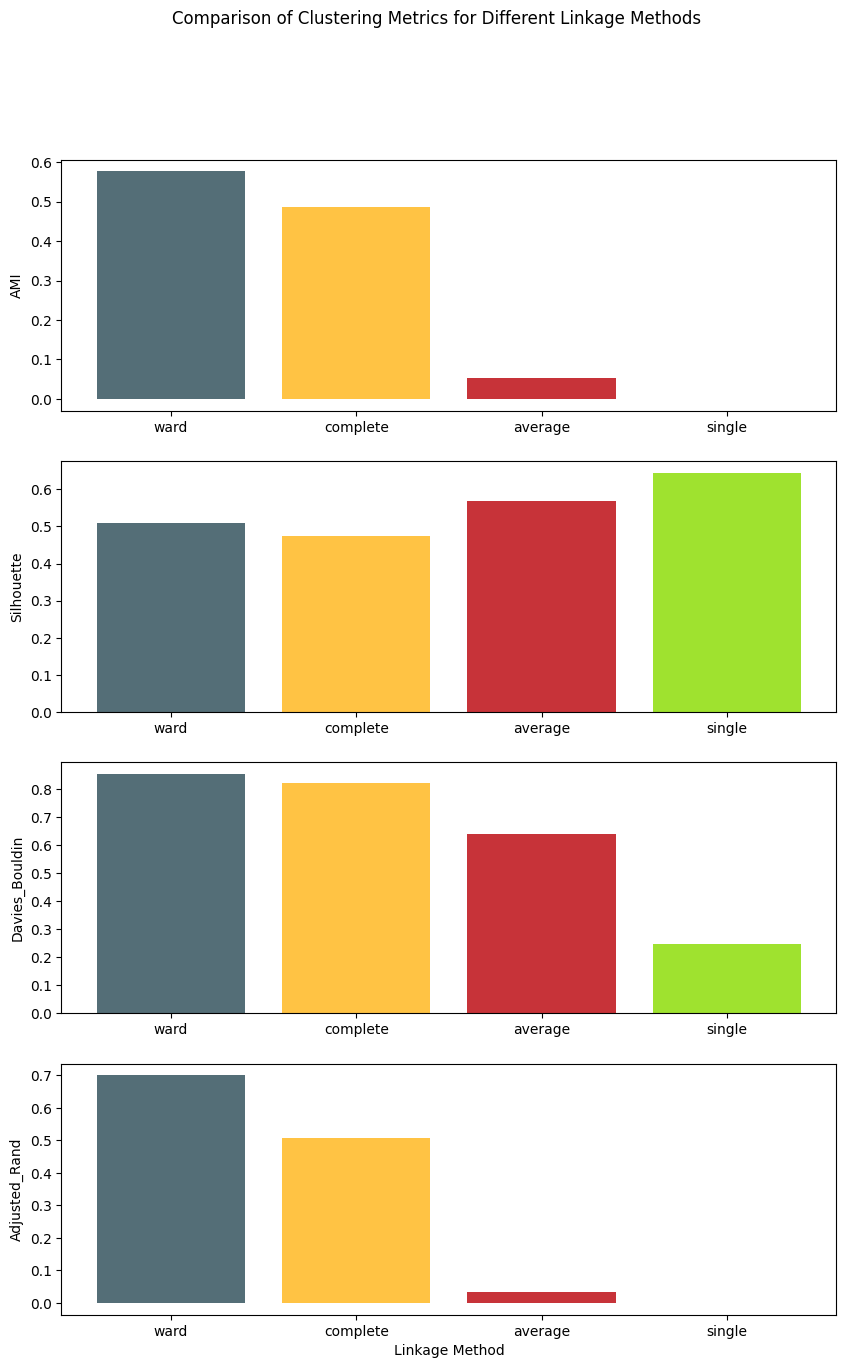

In [52]:
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 15))

for i, PCA_metric in enumerate(metrics):
    scores = [agg_pca[method][PCA_metric] for method in linkage_methods]
    axes[i].bar(linkage_methods, scores, color=['#546E77', '#FFC344', '#C73339', '#9FE22F'])
    axes[i].set_ylabel(PCA_metric)

plt.xlabel("Linkage Method")
plt.suptitle("Comparison of Clustering Metrics for Different Linkage Methods")
plt.show()

### DBSCAN

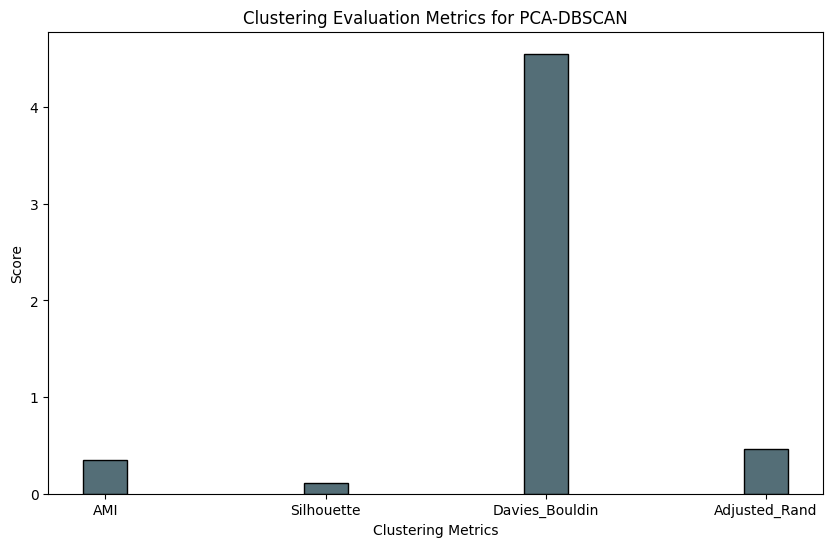

In [54]:
scores_PCA_DBSCAN = [ami_score_PCA_DBSCAN, silhouette_avg_PCA_DBSCAN, davies_bouldin_PCA_DBSCAN, adjusted_rand_PCA_DBSCAN]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_PCA_DBSCAN, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , metrics)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for PCA-DBSCAN")
plt.show()

### KMEANS++

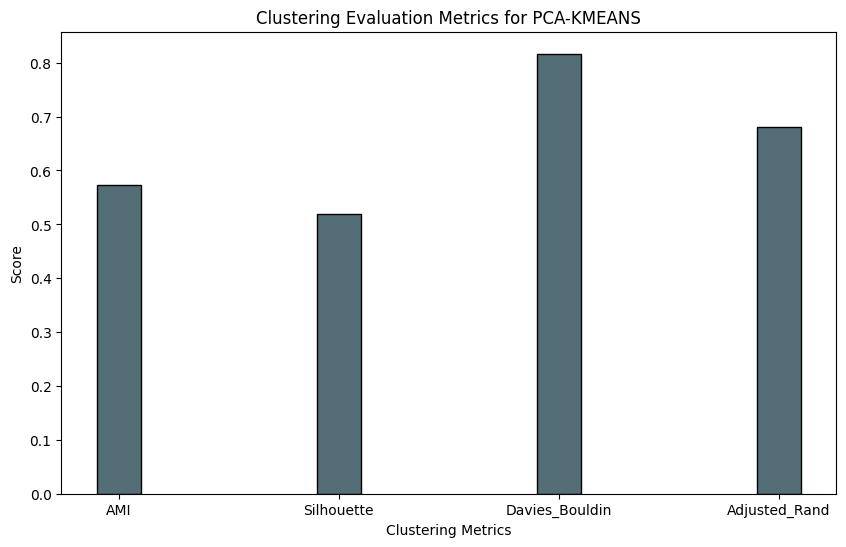

In [55]:
scores_PCA_KMEANS = [ami_score_PCA_KMEANS, silhouette_avg_PCA_KMEANS, davies_bouldin_PCA_KMEANS, adjusted_rand_PCA_KMEANS]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_PCA_KMEANS, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , metrics)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for PCA-KMEANS")
plt.show()

## TSVD

### AGNES

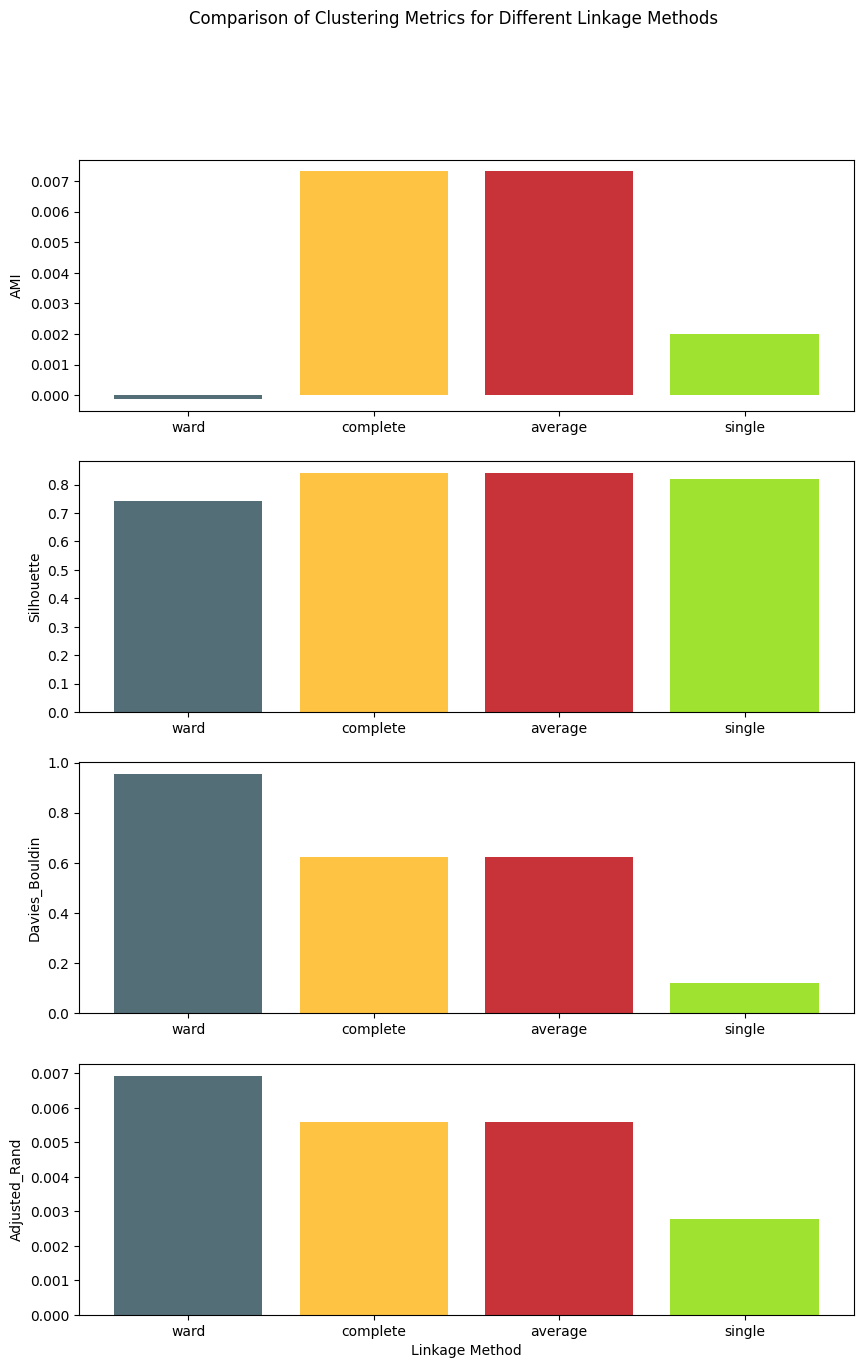

In [56]:
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 15))

for i, PCA_metric in enumerate(metrics):
    scores = [agg_TSVD[method][PCA_metric] for method in linkage_methods]
    axes[i].bar(linkage_methods, scores, color=['#546E77', '#FFC344', '#C73339', '#9FE22F'])
    axes[i].set_ylabel(PCA_metric)

plt.xlabel("Linkage Method")
plt.suptitle("Comparison of Clustering Metrics for Different Linkage Methods")
plt.show()

### DBSCAN

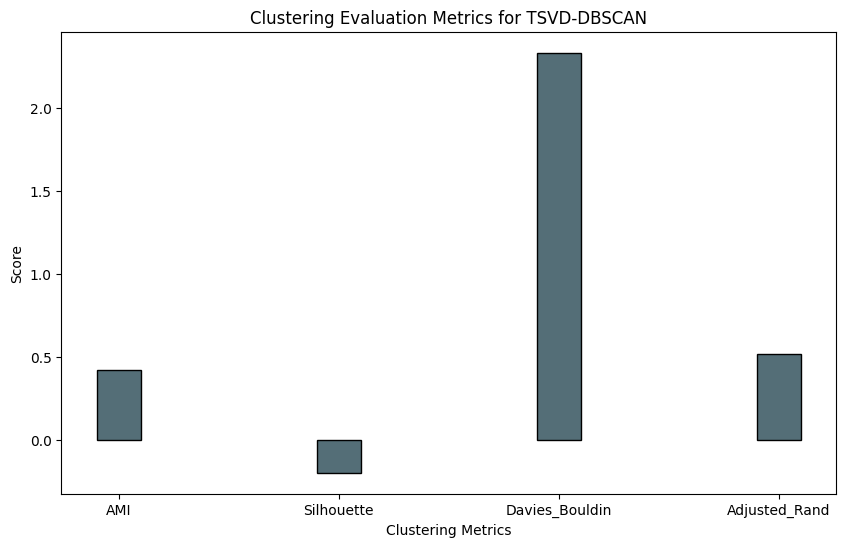

In [57]:
scores_TSVD_DBSCAN = [ami_score_TSVD_DBSCAN, silhouette_avg_TSVD_DBSCAN, davies_bouldin_TSVD_DBSCAN, adjusted_rand_TSVD_DBSCAN]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_TSVD_DBSCAN, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , metrics)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for TSVD-DBSCAN")
plt.show()

### KMEANS++

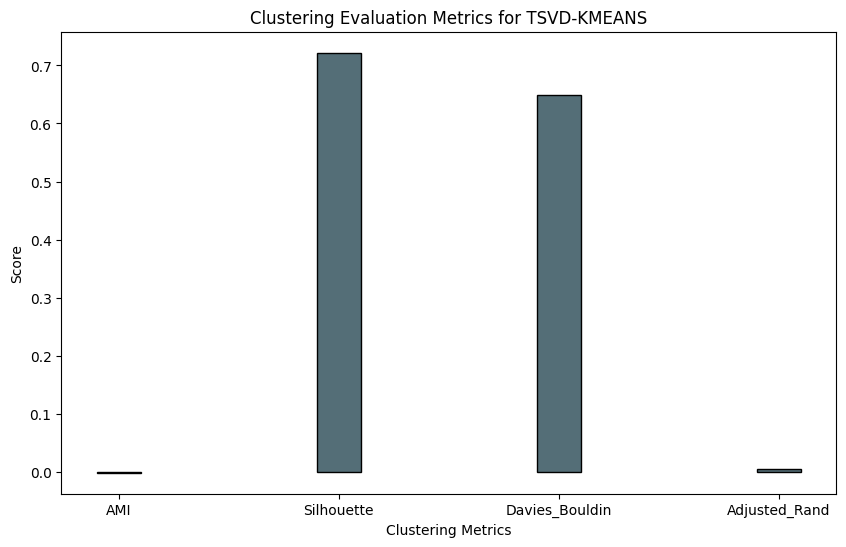

In [58]:
scores_TSVD_KMEANS = [ami_score_TSVD_KMEANS, silhouette_avg_TSVD_KMEANS, davies_bouldin_TSVD_KMEANS, adjusted_rand_TSVD_KMEANS]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_TSVD_KMEANS, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , metrics)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for TSVD-KMEANS")
plt.show()

## NMF

### AGNES

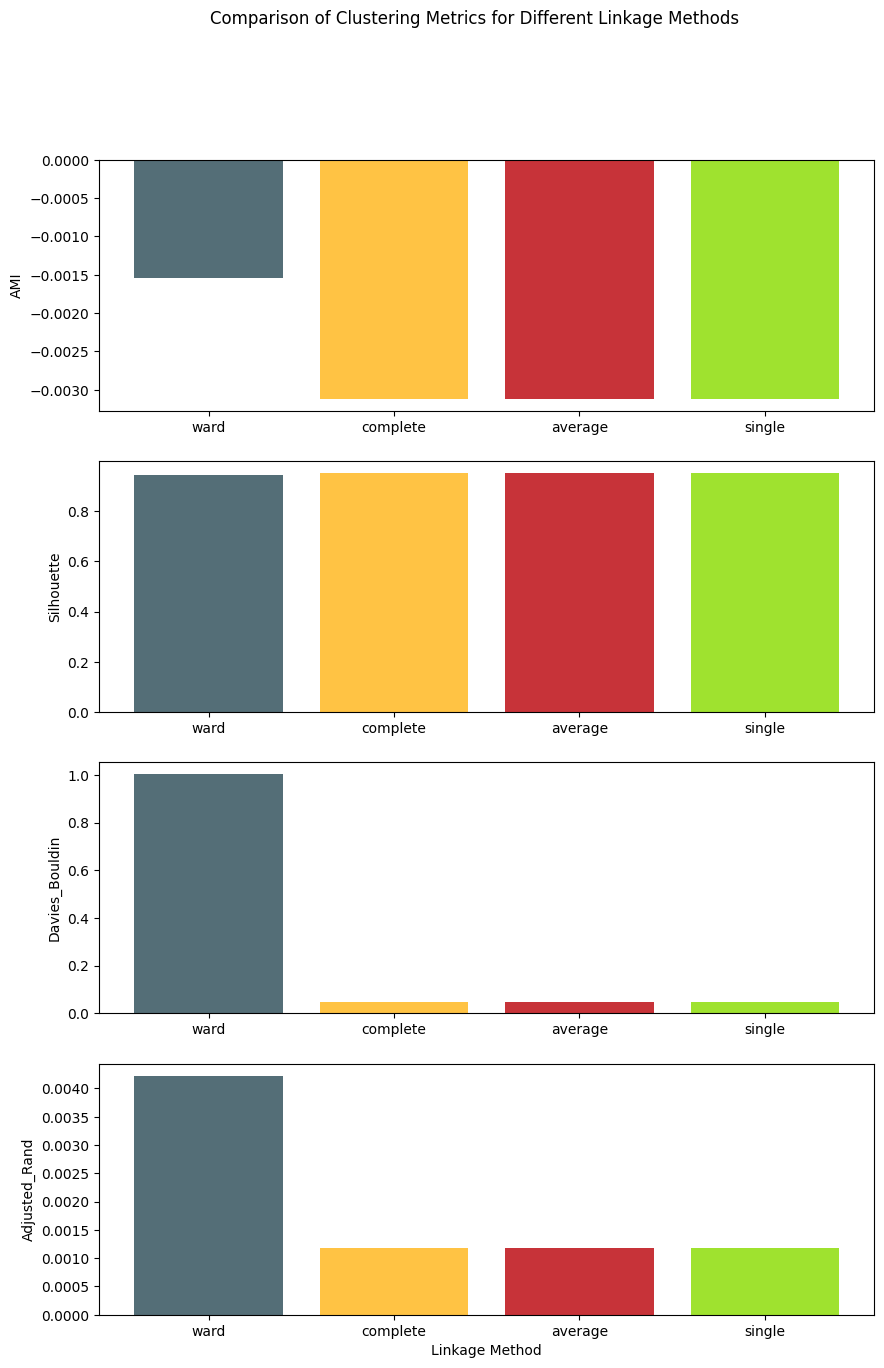

In [59]:
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 15))

for i, PCA_metric in enumerate(metrics):
    scores = [agg_NMF[method][PCA_metric] for method in linkage_methods]
    axes[i].bar(linkage_methods, scores, color=['#546E77', '#FFC344', '#C73339', '#9FE22F'])
    axes[i].set_ylabel(PCA_metric)

plt.xlabel("Linkage Method")
plt.suptitle("Comparison of Clustering Metrics for Different Linkage Methods")
plt.show()

### DBSCAN

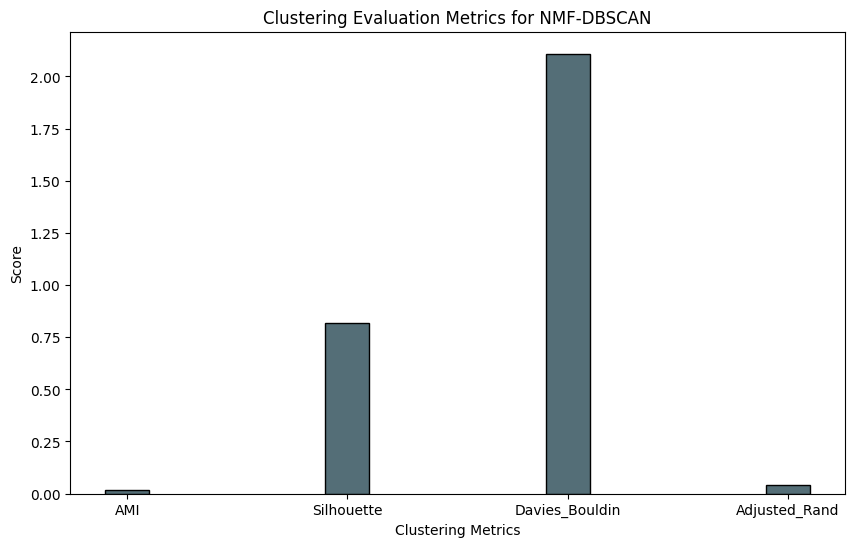

In [60]:
scores_NMF_DBSCAN = [ami_score_NMF_DBSCAN, silhouette_avg_NMF_DBSCAN, davies_bouldin_NMF_DBSCAN, adjusted_rand_NMF_DBSCAN]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_NMF_DBSCAN, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , metrics)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for NMF-DBSCAN")
plt.show()

### KMEANS++

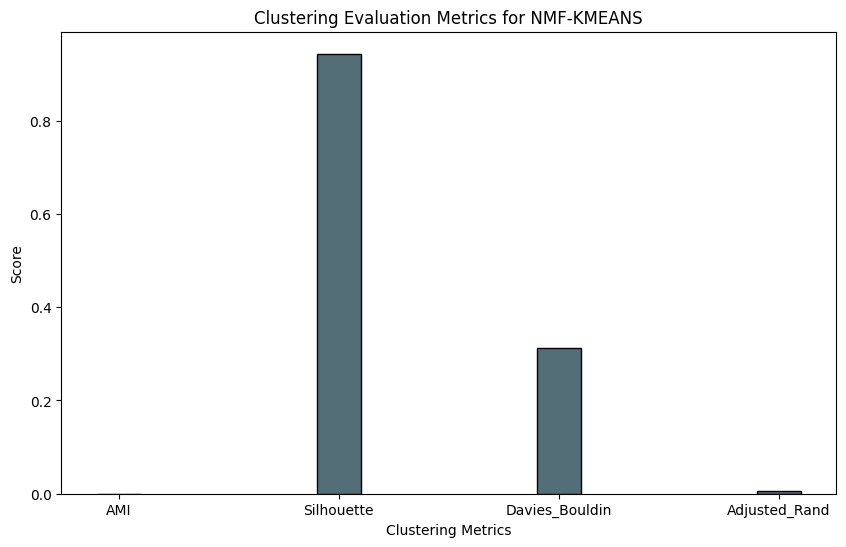

In [61]:
scores_NMF_KMEANS = [ami_score_NMF_KMEANS, silhouette_avg_NMF_KMEANS, davies_bouldin_NMF_KMEANS, adjusted_rand_NMF_KMEANS]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_NMF_KMEANS, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , metrics)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for NMF-KMEANS")
plt.show()

## LDA

### AGNES

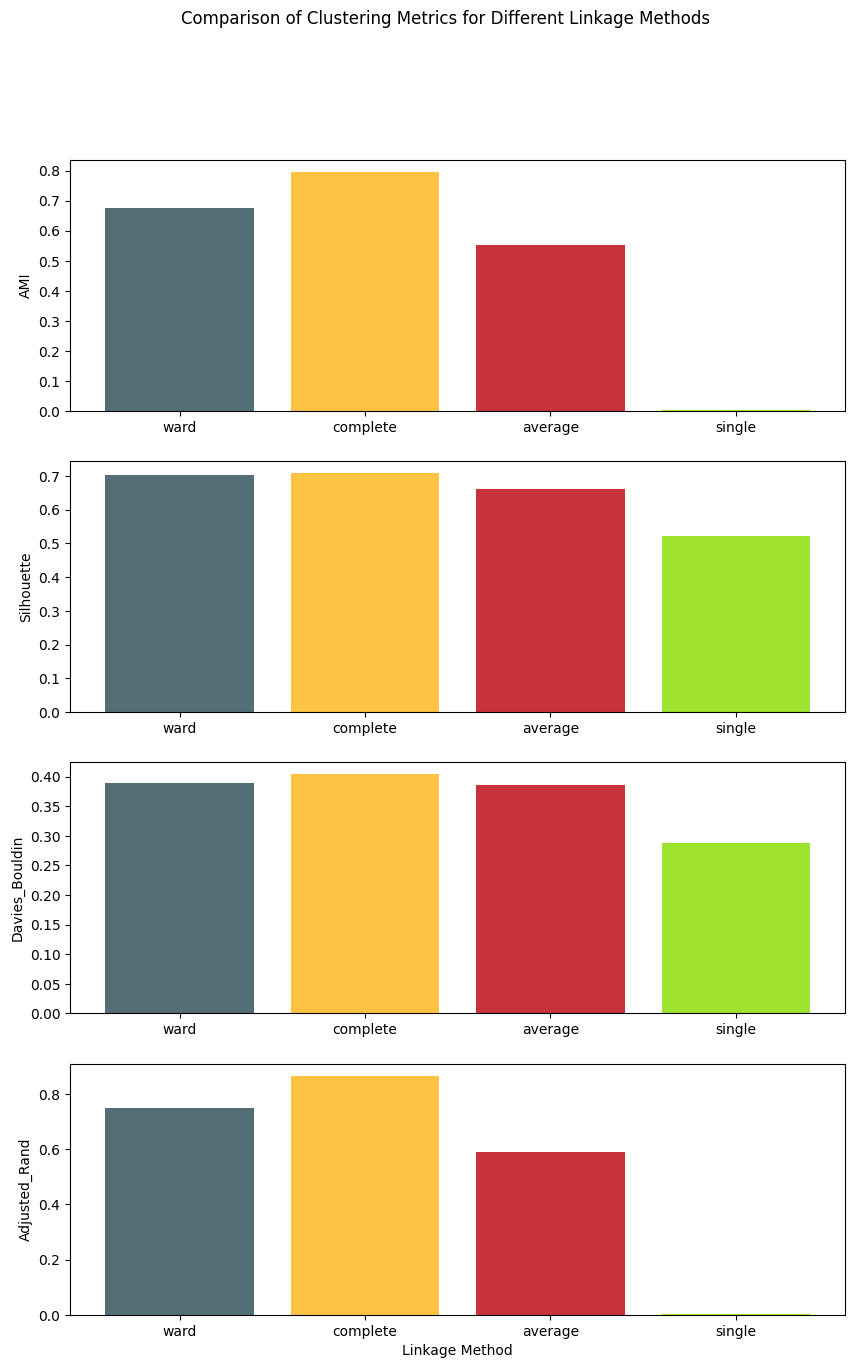

In [62]:
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 15))

for i, PCA_metric in enumerate(metrics):
    scores = [agg_LDA[method][PCA_metric] for method in linkage_methods]
    axes[i].bar(linkage_methods, scores, color=['#546E77', '#FFC344', '#C73339', '#9FE22F'])
    axes[i].set_ylabel(PCA_metric)

plt.xlabel("Linkage Method")
plt.suptitle("Comparison of Clustering Metrics for Different Linkage Methods")
plt.show()

### DBSCAN

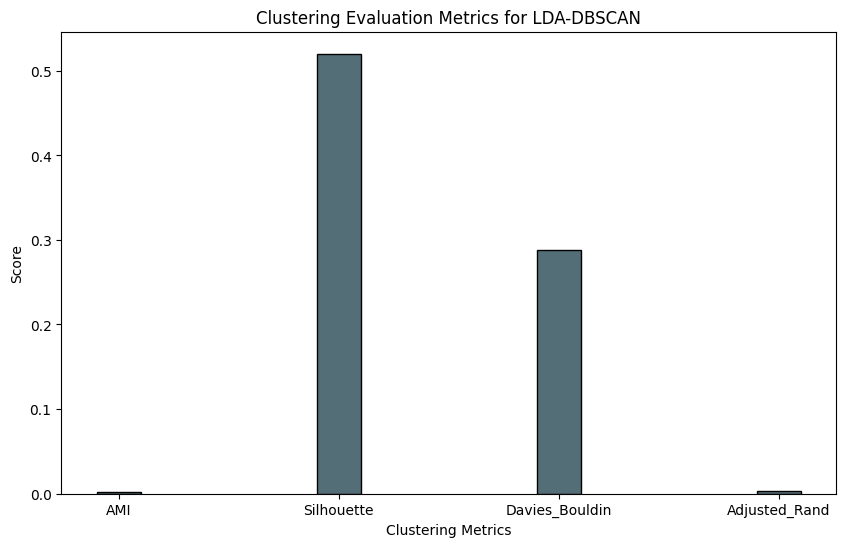

In [63]:
scores_LDA_DBSCAN = [ami_score_LDA_DBSCAN, silhouette_avg_LDA_DBSCAN, davies_bouldin_LDA_DBSCAN, adjusted_rand_LDA_DBSCAN]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_LDA_DBSCAN, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , metrics)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for LDA-DBSCAN")
plt.show()

### KMEANS++

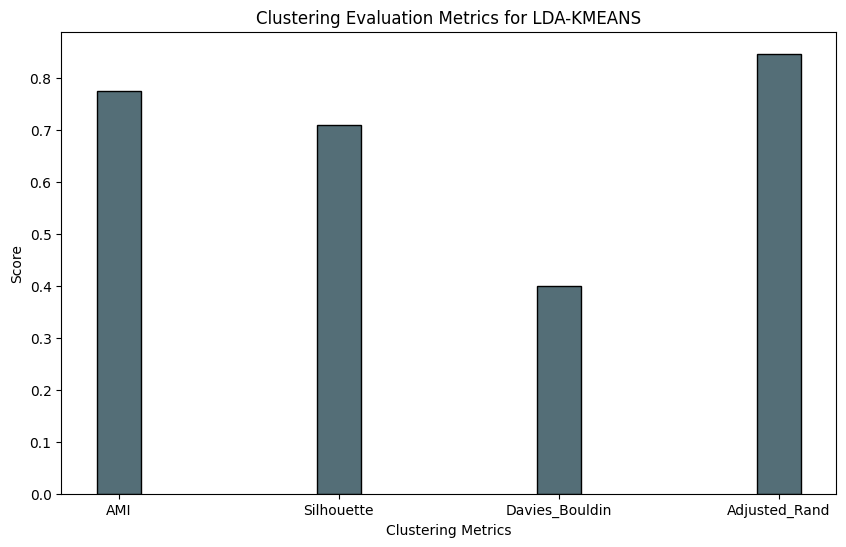

In [64]:
scores_LDA_KMEANS = [ami_score_LDA_KMEANS, silhouette_avg_LDA_KMEANS, davies_bouldin_LDA_KMEANS, adjusted_rand_LDA_KMEANS]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_LDA_KMEANS, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , metrics)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for LDA-KMEANS")
plt.show()

## DBSCAN AMI over different feature extraction

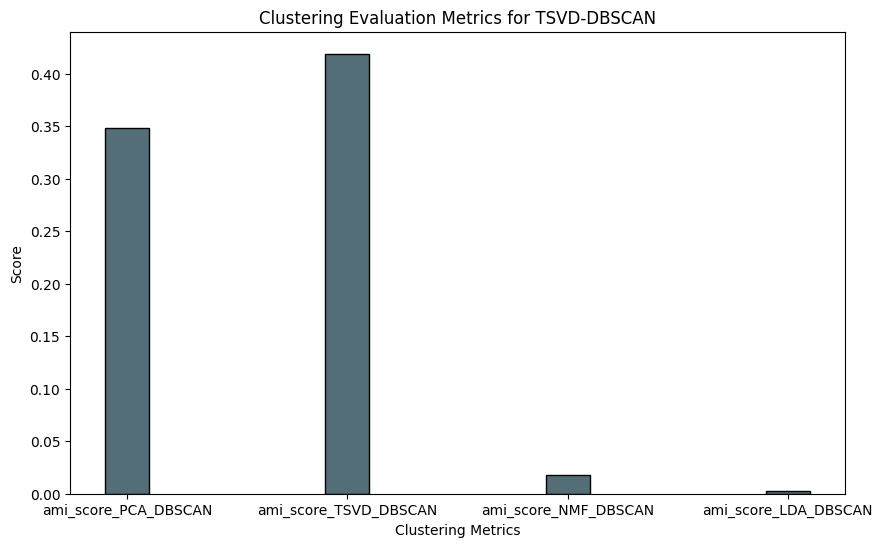

In [65]:
scores_DBSCAN = [ami_score_PCA_DBSCAN,ami_score_TSVD_DBSCAN, ami_score_NMF_DBSCAN,ami_score_LDA_DBSCAN]
columns_DBSCAN = ["ami_score_PCA_DBSCAN","ami_score_TSVD_DBSCAN", "ami_score_NMF_DBSCAN","ami_score_LDA_DBSCAN"]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_DBSCAN, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , columns_DBSCAN)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for TSVD-DBSCAN")
plt.show()

## KMEANS++ AMI over different feature extraction

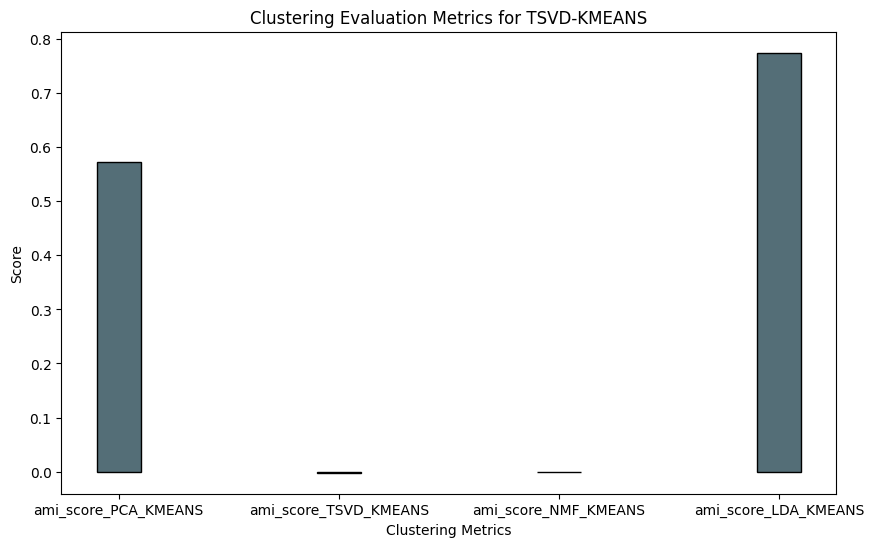

In [66]:
scores_KMEANS = [ami_score_PCA_KMEANS,ami_score_TSVD_KMEANS, ami_score_NMF_KMEANS,ami_score_LDA_KMEANS]
columns_KMEANS = ["ami_score_PCA_KMEANS","ami_score_TSVD_KMEANS", "ami_score_NMF_KMEANS","ami_score_LDA_KMEANS"]

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(metrics))

plt.bar(X_axis, scores_KMEANS, color="#546E77", width=0.2, edgecolor='black')
plt.xticks(X_axis , columns_KMEANS)

plt.xlabel("Clustering Metrics")
plt.ylabel("Score")
plt.title("Clustering Evaluation Metrics for TSVD-KMEANS")
plt.show()